# 1. Jupyter notebook

In [85]:
a = 10
b = 20

print a+b

# This is a comment

30


In [ ]:
"""

# Title 1

## Title 2

### Title 3

"""

# Title 1

## Title 2

### Title 3

# 2. Numpy

In [3]:
import numpy as np

In [10]:
# Unique values in an array

a = [2,2,3,5,4,5,6,7,7,2,2,9,8,5]
print np.unique(a)

unique, counts = np.unique(a, return_counts=True)
print unique, counts

[2 3 4 5 6 7 8 9]
[2 3 4 5 6 7 8 9] [4 1 1 3 1 2 1 1]


In [12]:
#  Create an array of zeros of size 10 and another of ones uniquement of size 20 

a = np.zeros(10)
b = np.ones(20)

print a,b

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
# Create an array of size 10 filled with random int values

a = np.random.randint(0, 10, 10)
print a

[9 6 6 3 1 6 9 1 6 8]


In [15]:
# Convert x to a matrix of 3x3

x = np.array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]) 
print x
print x.reshape(3,3,)

[ 2  3  4  5  6  7  8  9 10]
[[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]


In [21]:
# Shape, values per ligne, per column

x = np.array([[2,5],[4,4],[3,5],[6,7]]) 
print x
print 'shape' ,  x.shape
print 'Values first ligne ' , x[0]
print 'Values first column ' , x[:,0]


[[2 5]
 [4 4]
 [3 5]
 [6 7]]
shape (4, 2)
Values first ligne  [2 5]
Values first column  [2 4 3 6]


In [26]:
# Concatenate a and b in c per column and per ligne 

a = np.array([[0, 1, 3], [5, 7, 9]])
b = np.array([[0, 2, 4], [6, 8, 10]])

print a
print b

print ' Concatenate per ligne '
c = np.concatenate((a, b), axis=0 )
print c 
print ' Concatenate per column '
c = np.concatenate((a, b), axis=1 )
print c 

[[0 1 3]
 [5 7 9]]
[[ 0  2  4]
 [ 6  8 10]]
 Concatenate per ligne 
[[ 0  1  3]
 [ 5  7  9]
 [ 0  2  4]
 [ 6  8 10]]
 Concatenate per column 
[[ 0  1  3  0  2  4]
 [ 5  7  9  6  8 10]]


In [30]:
# File saving & File reading

x = np.array([1,2,3,5,3,4,10,15,20,55,43])

np.savetxt('out.txt', x ) # save
a = np.loadtxt('out.txt') # read

print a

[ 1.  2.  3.  5.  3.  4. 10. 15. 20. 55. 43.]


## Root_numpy

In [ ]:
"""
Public data credit to : https://github.com/yandexdataschool/mlhep2017/
"""

In [51]:
import uproot

rootFile = "public_train_10000.root"

tree=uproot.open(rootFile)
print tree.keys()

['tree;1']


In [52]:
tree['tree'].keys()

['event_id',
 'target',
 'lepton_pt',
 'lepton_eta',
 'lepton_phi',
 'mem_pt',
 'mem_phi',
 'jet1_pt',
 'jet1_eta',
 'jet1_phi',
 'jet1_btag',
 'jet2_pt',
 'jet2_eta',
 'jet2_phi',
 'jet2_btag',
 'jet3_pt',
 'jet3_eta',
 'jet3_phi',
 'jet3_btag',
 'jet4_pt',
 'jet4_eta',
 'jet4_phi',
 'jet4_btag',
 'm_jj',
 'm_jjj',
 'm_lv',
 'm_jlv',
 'm_bb',
 'm_wbb',
 'm_wwbb']

In [66]:
tree['tree']['lepton_pt']

<TBranch 'lepton_pt' at 0x7fd59b179e50>

# 3. File strcuture 

## 3.1 CSV

## 3.2 HDF5

In [71]:
import h5py

h5File = h5py.File('training.h5' , 'r+') 
    
gammaEvents = h5File.get( 'gamma' )
gammaTruthEnergies = gammaEvents['energy'][:]

energyL0 = np.array(gammaEvents['layer_0'][:])
energyL1 = np.array(gammaEvents['layer_1'][:])
energyL2 = np.array(gammaEvents['layer_2'][:])
energyOverFlow = np.array(gammaEvents['overflow'][:])

# 4. Matplotlib

In [74]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

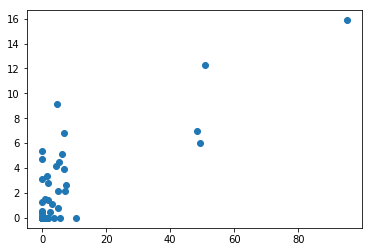

In [92]:
# Scatter plot 

plt.scatter(np.concatenate(energyL2[0]),np.concatenate(energyL2[100]) )
plt.show()

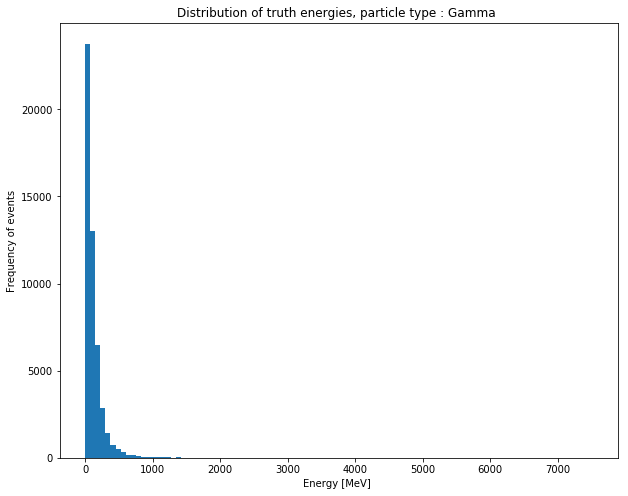

In [86]:
# Histogram

plt.figure(figsize=(10,8))
plt.hist( ([ np.sum(energyL2[pId]) for pId in range(len(energyL2)) ]) ,bins=100)
plt.xlabel("Energy [MeV] ")
plt.ylabel("Frequency of events")
plt.title("Distribution of truth energies, particle type : Gamma "   )
plt.show()

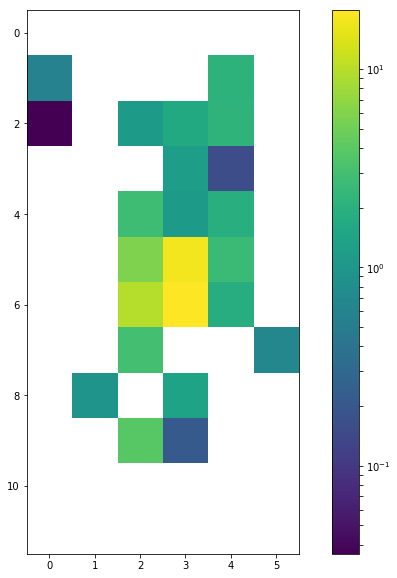

In [76]:
# Image

plt.figure( figsize=(12,10) )
plt.imshow( energyL2[10] , norm=LogNorm() ) 
plt.colorbar()
plt.show()

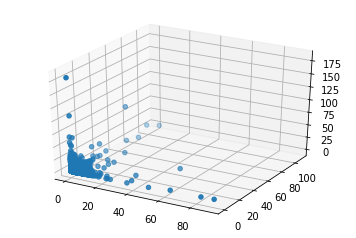

In [97]:
# 3D plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter( energyL2[:,0], energyL2[:,1], energyL2[:,2] )
plt.show()